<a href="https://colab.research.google.com/github/Varuni387/Image-Text-Speech/blob/main/EIS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

Reading image from: /content/Capture_1.jpg
Image 1 read successfully
Displaying the first image


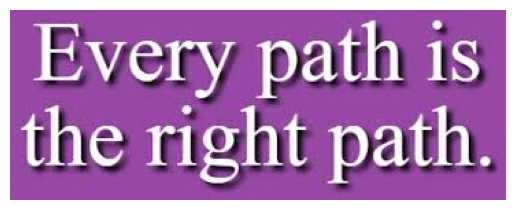

In [4]:
images=[]
for i in range(1, 2):  # Assuming you have one image for this example
    image_path = "/content/Capture_" + str(i) + ".jpg"  # Ensure the filename and path are correct
    print(f"Reading image from: {image_path}")  # Debugging statement to check path
    capture = cv2.imread(image_path)

    if capture is not None:
        print(f"Image {i} read successfully")
        images.append(capture)
    else:
        print(f"Failed to read image {i}")

# Check if there are any images in the list before displaying
if len(images) > 0:
    # Code to display 1 image
    print("Displaying the first image")
    plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis for better display
    plt.show()

In [5]:
!pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=0a20685b58a7e6436b34387df4a6f34d27a2918bf70e8d3642fce787e12c7ad6
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [6]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,084 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,854 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-upda

In [7]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 47 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Fetched 

In [ ]:
!tesseract -version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install pytesseract
import pytesseract
pytesseract.pytesseract.tesseract_cmd = (r'/bin/tesseract')


In [ ]:
img = cv2.imread("/content/Capture_1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
example_text=pytesseract.image_to_string(img)
print(pytesseract.image_to_string(img))

#image to boxes is used for detecting the letters
#boxes1 = pytesseract.image_to_boxes(img)
#for box in boxes1.splitlines() :
    #counter = counter + 1
    #box = box.split(' ')
    #x1,y1,w1,h1 = int(box[1]),int(box[2]),int(box[3]),int(box[4])
    #cv2.rectangle(img_with_text,((x1),(W-y1)),((w1),(W-h1)),(0,255,0),2)
    #cv2.putText(img_with_text,box[0],((x1),(W-y1+20)),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),2)
#from google.colab.patches import cv2_imshow
#cv2_imshow(img_with_text)
#print(example_text)

Every path is
the right path.



In [ ]:
!pip install -q torchaudio omegaconf

import torch
from pprint import pprint
from omegaconf import OmegaConf
from IPython.display import Audio, display

torch.hub.download_url_to_file('https://raw.githubusercontent.com/snakers4/silero-models/master/models.yml',
                               'latest_silero_models.yml',
                               progress=False)
models = OmegaConf.load('latest_silero_models.yml')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
available_languages = list(models.tts_models.keys())
print(f'Available languages {available_languages}')
for lang in available_languages:
    _models = list(models.tts_models.get(lang).keys())
    print(f'Available models for {lang}: {_models}')

Available languages ['ru', 'en', 'de', 'es', 'fr', 'ba', 'xal', 'tt', 'uz', 'ua', 'indic', 'cyrillic', 'multi']
Available models for ru: ['v4_ru', 'v3_1_ru', 'ru_v3', 'aidar_v2', 'aidar_8khz', 'aidar_16khz', 'baya_v2', 'baya_8khz', 'baya_16khz', 'irina_v2', 'irina_8khz', 'irina_16khz', 'kseniya_v2', 'kseniya_8khz', 'kseniya_16khz', 'natasha_v2', 'natasha_8khz', 'natasha_16khz', 'ruslan_v2', 'ruslan_8khz', 'ruslan_16khz']
Available models for en: ['v3_en', 'v3_en_indic', 'lj_v2', 'lj_8khz', 'lj_16khz']
Available models for de: ['v3_de', 'thorsten_v2', 'thorsten_8khz', 'thorsten_16khz']
Available models for es: ['v3_es', 'tux_v2', 'tux_8khz', 'tux_16khz']
Available models for fr: ['v3_fr', 'gilles_v2', 'gilles_8khz', 'gilles_16khz']
Available models for ba: ['aigul_v2']
Available models for xal: ['v3_xal', 'erdni_v2']
Available models for tt: ['v3_tt', 'dilyara_v2']
Available models for uz: ['v4_uz', 'v3_uz', 'dilnavoz_v2']
Available models for ua: ['v4_ua', 'v3_ua', 'mykyta_v2']
Availab

In [ ]:
import torch
language = 'en'
model_id = 'v3_en'
device = torch.device('cpu')
model, example_text = torch.hub.load(repo_or_dir='snakers4/silero-models',
                                     model='silero_tts',
                                     language=language,
                                     speaker=model_id)
model.to(device)  # gpu or cpu

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/snakers4/silero-models/zipball/master" to /root/.cache/torch/hub/master.zip
 51%|█████     | 27.8M/54.5M [59:39<50:11, 9.33kB/s]

In [ ]:
model.speakers

In [ ]:
sample_rate = 48000
speaker = 'en_1'
put_accent=True
put_yo=True
#example_text = 'This is EIS project'

audio = model.apply_tts(text=example_text,
                        speaker=speaker,
                        sample_rate=sample_rate,
                        put_accent=put_accent,
                        put_yo=put_yo)
print(example_text)
display(Audio(audio, rate=sample_rate))

Every path is
the right path.



In [ ]:
ssml_sample = """
              <speak>
              <p>
                  I am currently working on <prosody rate="x-slow">Embedded course</prosody>.
                  project <prosody pitch="x-high"> The title of the project is </prosody>,
                  <prosody pitch="x-low">Converting image to text to speech </prosody>.
                 <prosody rate="fast">Hope so I will be</prosody>
                  able to finish it soon<break time="2000ms"/>.
              </p>
              </speak>
              """

sample_rate = 48000
speaker = 'en_1'
audio = model.apply_tts(ssml_text=ssml_sample,
                        speaker=speaker,
                        sample_rate=sample_rate)
display(Audio(audio, rate=sample_rate))

Random speaker

In [ ]:
sample_rate = 48000
speaker = 'random'

example_text = 'Trying to generate random voice'

audio = model.apply_tts(text=example_text,
                        speaker=speaker,
                        sample_rate=sample_rate)
print(example_text)
display(Audio(audio, rate=sample_rate))

Generated new voice
Trying to generate random voice


In [ ]:
voice_path = 'test_voice.pt'
model.save_random_voice(voice_path)

Saved generated voice to test_voice.pt
